# Sentiment Analysis Notebook

#### This notebook contains a demonstration of the tools necessary for conducting descriptive analysis of the data. This includes things such as frequency analysis, descripting statistics and temporal frequency.

In [1]:
import trt_API.process as proc
import trt_API.analysis as ana
import trt_API.sentiment as sent
from pathlib import Path
import pandas as pd
import datetime
SORTED = False
pd.set_option('display.max_rows', 500)

## Variables for Analysis

In [2]:
# Set the path to the parent directory containing all Tweets of interest
DIRECTORY = './tweets/*'
# Set to True to isolate english language tweets
ENGLISH = False


## Load Tweet and Generate Dataframe

In [3]:
tweet_objects = proc.loadTweetObjects(DIRECTORY)
print(len(tweet_objects))
df = proc.convertTweetsToDataframe(tweet_objects, ENGLISH)
print(df)    

16044
Loaded utf-8 df.
Initial size: 16042
Dropping duplicates...
Final size: 10472
                          date  followers        username  \
0      Jun 01 20:02:51 2018\t0         88       Yohanan_L   
1      Jun 01 22:19:01 2018\t0        464       Kiakkye30   
2      Jun 08 00:04:48 2018\t0       1019       KessprdGB   
3      Jun 08 03:27:48 2018\t0         24  quynhnguyen153   
4      Jun 08 07:44:53 2018\t0          1       mlqbuot27   
...                        ...        ...             ...   
16032  Jul 10 22:48:21 2019\t0        213    KyleLGurrola   
16034  Jul 10 23:02:54 2019\t0       3344      NW_StayDet   
16036  Jul 10 23:08:36 2019\t0         36        TOMMMLDN   
16038  Jul 10 23:27:23 2019\t0        229    GenDovinBaan   
16040  Jul 10 23:29:22 2019\t0       1409     UncleMax313   

                       location  \
0                        France   
1                         Haiti   
2                          None   
3                          None   
4      ‡

## Extract Potential Cashtags

In [4]:
ctdf = proc.extractPossibleCashtags(df)

Total potential Cashtags: 25


## Removing Noisy Tweets

In [5]:
'''
*** Tweets often use popular hashtags with unrelated topics.
*** Noisy words can be identified to use to filter such tweets.
*** Enter these words below in the noisy_terms list.
'''
noisy_terms = []
cldf = proc.removeNoisyTerms(df, noisy_terms)

Removed 0 noisy terms.


## Remove Retweets

In [6]:
cldf_no_RT, cldf = proc.removeRetweets(cldf)
pd.set_option('display.max_colwidth', None)
cldf

Removed 4110 duplicates.


/Users/rajuy/Desktop/twitter_research_tools/notebooks/trt_API/process.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RT'][df.tweet.astype(str).str[0:2] == 'RT'] = df.tweet.str.split(':',expand=True).iloc[:,0]


date  followers        username  \
0      Jun 01 20:02:51 2018\t0         88       Yohanan_L   
1      Jun 01 22:19:01 2018\t0        464       Kiakkye30   
2      Jun 08 00:04:48 2018\t0       1019       KessprdGB   
3      Jun 08 03:27:48 2018\t0         24  quynhnguyen153   
4      Jun 08 07:44:53 2018\t0          1       mlqbuot27   
...                        ...        ...             ...   
16032  Jul 10 22:48:21 2019\t0        213    KyleLGurrola   
16034  Jul 10 23:02:54 2019\t0       3344      NW_StayDet   
16036  Jul 10 23:08:36 2019\t0         36        TOMMMLDN   
16038  Jul 10 23:27:23 2019\t0        229    GenDovinBaan   
16040  Jul 10 23:29:22 2019\t0       1409     UncleMax313   

                       location  \
0                        France   
1                         Haiti   
2                          None   
3                          None   
4      ‡∏Å‡∏£‡∏∏‡∏á‡πÄ‡∏ó‡∏û‡∏°‡∏´‡∏≤‡∏ô‡∏Ñ‡∏£, ‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®‡πÑ‡∏ó‡∏¢   
...                         ...   
16032      San Jose, California   
16034               Detroit, MI   
16036       Chernobyll, Ukraine   
16038       The Plane of Ixalan   
16040        Michigan and Texas   

                                                                                                                                              tweet  \
0                                 @AnthonyParasole @kanyewest All right didn't know but I agree, Pusha T opus is better. Let's see Cudi now. Cheers   
1           RT @TwitterMusic: Give #NewMusicFriday a try. üé∂üéµ @DanAndShay ‚ûñ Alone Togetherüéµ @Drake ‚ûñ I'm Upsetüéµ @FLAGALine‚ûñ Simpleüéµ @kanyewest ‚ûñ ye‚Ä¶   
2                         RT @GOT7Official: [ #GOT7NOW ] See you tomorrow, Berlin I GOT7 üê•#GOT7#Í∞ìÏÑ∏Î∏ê#EyesOnYou#GOT7WORLDTOUR https://t.co/HtO7G7SQLO   
3                       RT @chanyeolit: #CHANYEOL #EXO #Monster #Ï∞¨Ïó¥ @weareoneEXO üçæ Monster 200M üëªüòàüéâ https://t.co/CJ3fhvIdek https://t.co/uraD3nrlfW   
4                         RT @GOT7Official: [ #GOT7NOW ] See you tomorrow, Berlin I GOT7 üê•#GOT7#Í∞ìÏÑ∏Î∏ê#EyesOnYou#GOT7WORLDTOUR https://t.co/HtO7G7SQLO   
...                                                                                                                                             ...   
16032  RT @drewisgooden: Excuse me @Delta but this is outrageous. I just got sucked through the toilet hole in one of your aircrafts and am now hu‚Ä¶   
16034                                                                      @ComedianTheDA @GAFollowers @Delta @ABC Right... https://t.co/ZewAeTJP3J   
16036  RT @Micahlifa: Video I took from my seat on my flight from Atlanta to Baltimore yesterday! Thanks @Delta for the silly smooth emergency lan‚Ä¶   
16038  RT @Micahlifa: Video I took from my seat on my flight from Atlanta to Baltimore yesterday! Thanks @Delta for the silly smooth emergency lan‚Ä¶   
16040                                                       @nysteve27 @AmericanAir Steve, I use to work inflight. That was very cool of you, budüëçüëç   

                        id  \
0      1002641647736377346   
1      1002675915221098496   
2      1004876863670374401   
3      1004927950293045248   
4      1004992647411298310   
...                    ...   
16032  1149087994898288642   
16034  1149091656508923909   
16036  1149093090973704192   
16038  1149097817962680320   
16040  1149098317089054721   

                                                                                                                                                                                                                                                                     original_tweet  \
0                                                                                                                                                                                                                                                                              None   
1                        

In [7]:
print(cldf.shape[0])
print(cldf_no_RT.shape[0])

10472
6362


## SPLITTING DATA

### By date

In [8]:
cldf, SORTED = ana.sortByDate(cldf,SORTED,PRINT_TOP=False,TOP=10)
cldf

date  followers         username               location  \
13247 2018-03-30 02:24:13         86          got7run               31/05/15   
13248 2018-03-30 02:58:39        271            Xreo0                   None   
13249 2018-03-30 07:02:29      47858          AraiEij                   None   
13250 2018-03-30 08:51:10        909   DAYDREAM_09_04  Corrientes, Argentina   
13251 2018-03-30 10:15:24         26           dldbr5                   None   
...                   ...        ...              ...                    ...   
15542 2019-07-13 11:35:48         18     AkhtarAskari                   None   
15544 2019-07-13 12:01:15       1095     doublemacbex        London, England   
15546 2019-07-13 12:16:08          0  Teshage70456217                   None   
15548 2019-07-13 12:42:27          8        NoamHabot                   None   
15550 2019-07-13 12:52:37        179   groupabarbados         Callas, France   

                                                                                                                                                 tweet  \
13247   RT @CRUSHonBAM: [STREAM] 180330 KBS&lt;Music Bank&gt; ‡πÄ‡∏ß‡∏•‡∏≤ 15.00 ‡∏ô.(‡πÑ‡∏ó‡∏¢) #GOT7 #EyesOnYou #LOOK‚ñ∫https://t.co/vjCT1ycCuU ‚ñ∫https://t.co/1VX55DN‚Ä¶   
13248                                                                                                                    2 minutesüò≠üíîüíî#WelcomeOliviaHye   
13249                                                                     RT @semljnika: Poppies..       üåøüå∫üåøüå∫üåøüå∫ #LovelyEvening https://t.co/dYiocpuiX1   
13250                                     #Repost bts.0ffcial (get_repost)„Éª„Éª„ÉªJIKOOK or TAEKOOK ?‚ù§.....#BTS #BangtanSonyeondan‚Ä¶ https://t.co/LdPytufdo1   
13251                                                                    RT @GOT7Official: Look - GOT7https://t.co/VrzKFobSes#GOT7 #Í∞ìÏÑ∏Î∏ê#EyesOnYou#Look   
...                                                                                                                                                ...   
15542       RT @qatarairways: Onward to #Rabat with our @BoeingAirplanes 787 Dreamliner, our third gateway and the capital of #Morocco. Book now at h‚Ä¶   
15544                                                                                                                    @British_Airways Thanks, Kev.   
15546                                                                                                                           @flyethiopian Congrats   
15548  RT @rashi_saxena7: I have sent two emails over the last 1 month to @AmericanAir customer relations for shit customer service &amp; spent $900.‚Ä¶   
15550     RT @jolingkent: Was just harassed by a @Delta gate agent for carrying a TSA-approved breast pump on the plane. Something I do often w no is‚Ä¶   

                        id  \
13247   979544798431342593   
13248   979553463859326977   
13249   979614826510008320   
13250   979642177570656257   
13251   979663375595655168   
...                    ...   
15542  1150005905728999425   
15544  1150012310435651584   
15546  1150016055940661249   
15548  1150022678750740481   
15550  1150025237276299266   

                                                                                                                                                                                                                                                                           original_tweet  \
13247                                                                                                    [STREAM] 180330 KBS&lt;Music Bank&gt; ‡πÄ‡∏ß‡∏•‡∏≤ 15.00 ‡∏ô.(‡πÑ‡∏ó‡∏¢) #GOT7 #EyesOnYou #LOOK‚ñ∫https://t.co/vjCT1ycCuU ‚ñ∫https://t.co/1VX55DNJn4‚ñ∫https://t.co/fF6eBFqiFZ https://t.co/9omvZQZw2I   
13248                                                                                                                                                                                      

### By term

In [9]:
terms_of_interest = ['beale street','bealestreet']
more_terms_of_interest = ['black panther','blackpanther']
bsdf = proc.findTerms(cldf_no_RT, terms_of_interest)
bpdf = proc.findTerms(cldf_no_RT, more_terms_of_interest)

Found 0 terms of interest.
Found 1 terms of interest.


/Users/rajuy/Desktop/twitter_research_tools/notebooks/trt_API/process.py:177: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.good = df['tweet'].str.lower().str.contains(\


## Convert Tweets to List

In [10]:
cldf_no_RT['original_tweet'][cldf_no_RT.original_tweet == 'None'] = cldf_no_RT['tweet']
cldf_no_RT['tweet'] = cldf_no_RT['original_tweet']
del cldf_no_RT['original_tweet']
print(cldf_no_RT.head())
tweets = list(cldf_no_RT.tweet)

                      date  followers        username  \
0  Jun 01 20:02:51 2018\t0         88       Yohanan_L   
1  Jun 01 22:19:01 2018\t0        464       Kiakkye30   
2  Jun 08 00:04:48 2018\t0       1019       KessprdGB   
3  Jun 08 03:27:48 2018\t0         24  quynhnguyen153   
5  Jun 08 08:32:53 2018\t0       1219   incredibleMoh   

                      location  \
0                       France   
1                        Haiti   
2                         None   
3                         None   
5  vers l'infini et au dela..    

                                                                                                                                                                                                                             tweet  \
0                                                                                                                @AnthonyParasole @kanyewest All right didn't know but I agree, Pusha T opus is better. Let's see Cudi now. Ch

<ipython-input-10-cb5c7012204d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cldf_no_RT['original_tweet'][cldf_no_RT.original_tweet == 'None'] = cldf_no_RT['tweet']


## Sentiment

### Total Sentiment

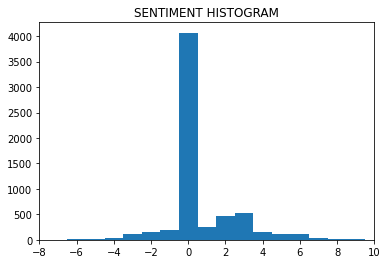

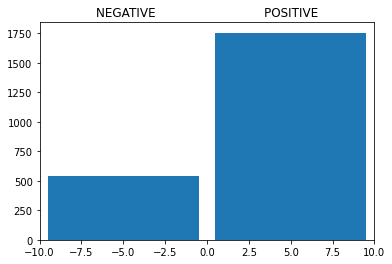

In [11]:
'''
*** First we can look at overall sentiment.
*** Here we will look at a histogram and a binary comparison (ignoring neutral).
'''
srange = (-8,10) # sentiment range (for plot)
sent.plotTotalSentiment(tweets,srange)

### Hashtag & Username Raw Sentiment

In [12]:
NORMALIZED = False
PLOT = True

#### Hashtags

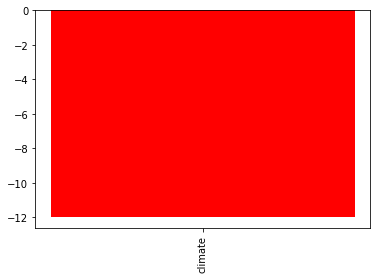

In [13]:
'''
*** Here we compute sentiment for each hashtag of interest.
'''
hashtags = ["climate"]
raw_htag_sent = sent.computeHashtagSentiment(tweets,hashtags,NORMALIZED,PLOT)

#### Usernames

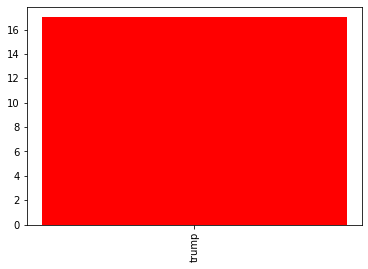

In [14]:
'''
*** Here we compute sentiment for each username of interest.
'''
usernames = ["Trump"]
raw_user_sent = sent.computeHashtagSentiment(tweets,usernames,NORMALIZED,PLOT)

### Hashtag & Username Normalized Sentiment

In [15]:
NORMALIZED = True

#### Hashtags

#### Usernames

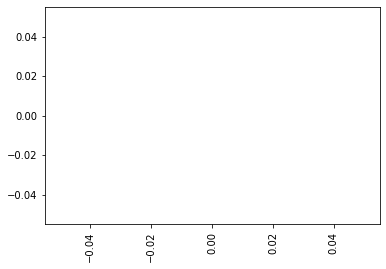

In [16]:
'''
*** Here we compute sentiment for each username of interest.
'''
usernames = []
norm_user_sent = sent.computeHashtagSentiment(tweets,usernames,NORMALIZED,PLOT)

## View Sentiment over Time

In [17]:
cldf_no_RT = sent.computeDataframeSentiment(cldf_no_RT)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [18]:
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
cldf_no_RT.sentiment.groupby([cldf_no_RT['date'].dt.year,cldf_no_RT["date"].dt.month]).mean().plot(kind="bar")

AttributeError: Can only use .dt accessor with datetimelike values

### Subset Sentiment by Date

## Compare Sentiment from Different Dataframes

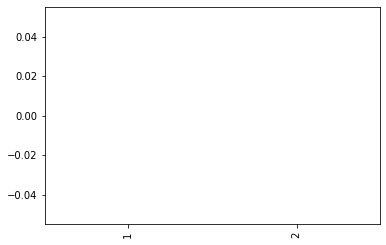

In [ ]:
df_list = [bsdf,bpdf]
normalized = True
labels = ['1','2']
sent.compareSentimentByDataframe(df_list,normalized,labels)

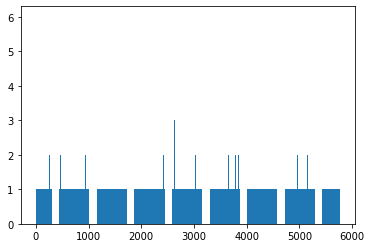

In [ ]:
import matplotlib.pyplot as plt

unq = set(tweets)

freq = {uname: tweets.count(uname) for uname in unq}
plt.bar(range(len(unq)), freq.values())
plt.show()

In [ ]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')



def percentage(part,whole):
 return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
noOfTweet = 1000

negativeCount=0
positiveCount=0
neutralCount=0

for tweet in tweets:
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity


        
        
        
        
    if neg > pos:
        negativeCount+=1
        negative_list.append(tweet)
  
    elif pos > neg:
        positiveCount+=1
        positive_list.append(tweet)
    
    elif pos == neg:
        neutralCount+=1
        neutral_list.append(tweet)
        
    positive = percentage(positive, noOfTweet)
    negative = percentage(negative, noOfTweet)
    neutral = percentage(neutral, noOfTweet)
    polarity = percentage(polarity, noOfTweet)
    positive = format(positiveCount, '.1f')
    negative = format(negativeCount, '.1f')
    neutral = format(neutralCount, '.1f')
    
print(positive)


/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rajuy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


1962.0


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))
tweet_list

total number:  6044
positive number:  1962
negative number:  549
neutral number:  3533


0
0     [STREAM] 180330 KBS&lt;Music Bank&gt; ‡πÄ‡∏ß‡∏•‡∏≤ 15.00 ‡∏ô.(‡πÑ‡∏ó‡∏¢) #GOT7 #EyesOnYou #LOOK‚ñ∫https://t.co/vjCT1ycCuU ‚ñ∫https://t.co/1VX55DNJn4‚ñ∫https://t.co/fF6eBFqiFZ https://t.co/9omvZQZw2I
1                                                                                                                                                        2 minutesüò≠üíîüíî#WelcomeOliviaHye
2                                                                                                                        Poppies..       üåøüå∫üåøüå∫üåøüå∫ #LovelyEvening https://t.co/dYiocpuiX1
3                                                                         #Repost bts.0ffcial (get_repost)„Éª„Éª„ÉªJIKOOK or TAEKOOK ?‚ù§.....#BTS #BangtanSonyeondan‚Ä¶ https://t.co/LdPytufdo1
4                                                                                                                          Look - GOT7https://t.co/VrzKFobSes#GOT7 #Í∞ìÏÑ∏Î∏ê#EyesOnYou#Look
...                                                                                                                                                                                ...
6039                 [HQ] 1806029 #CHANYEOL #Ï∞¨Ïó¥Cr: Playing With Firehttps://t.co/mzqLlzwHarhttps://t.co/0IRlRuXAyShttps://t.co/yxTfHZuuXY#EXO #ÏóëÏÜå @weareoneEXO https://t.co/vvsNXhXFUI
6040                                                                  RT RT mikeshapirodrum #KCAMexico #KCAArgentina #DemiLovato #EchameLaCulpa #SofiaReyes #SofiaReyesTrendy #JBalvin
6041                                           [HQ] 180608 #Yebin #Uni_T fansign @ Kobacco Hall (3)#Î∞±ÏòàÎπà #ÏòàÎπà #Îã§Ïù¥ÏïÑ #DIA #Ïú†ÎãàÌã∞ #UNIT @dia_official @official_uni_T https://t.co/XuTnGIAMsG
6042                                                         Gain 1000 more followers in 35 mins!!‚úìRetweet to get followed‚úì Follow everybody who follows youLet's GO  üî•#GainWithPyeWaw
6043                                                                             Is it Friday yet? ‚ö°#Energica #MyElectricEgo #Electric #Sportbike #nogasneeded https://t.co/CkxLF4bHo3

[6044 rows x 1 columns]

32.46194573130377 9.083388484447386 58.45466578424884


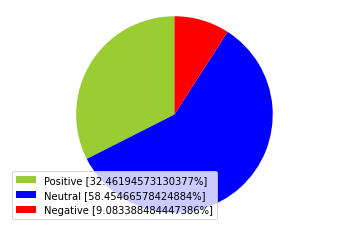

In [ ]:
positive_percentage = len(positive_list)/len(tweet_list)*100
negative_percentage = len(negative_list)/len(tweet_list)*100
neutral_percentage = len(neutral_list)/len(tweet_list)*100
print(positive_percentage,negative_percentage, neutral_percentage )
labels = ['Positive ['+str(positive_percentage)+'%]' , 'Neutral ['+str(neutral_percentage)+'%]','Negative ['+str(negative_percentage)+'%]']
sizes = [positive_percentage, neutral_percentage, negative_percentage]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.axis('equal')
plt.show()